In [96]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import esutil
import os, sys
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from scipy import stats

In [3]:
np.random.seed(987654321)

In [92]:
n1 = 2000
n2 = 3000
rvs1 = stats.norm.rvs(size=n1, loc=105., scale=1)
rvs2 = stats.norm.rvs(size=n2, loc=105, scale=1.1)

In [164]:
def ks_test( sample1, sample2, tag = '', bins=None ):

    #bins = np.linspace(100, 110, 100)

    fig, (ax,ax2) = plt.subplots(2,1,figsize=(7,10))
    N1, _, _= ax.hist(sample1, bins = bins, normed=True  )
    N2, _, _= ax.hist(sample2, bins = bins,normed=True  )
    ax.set_xlabel(tag)
    ax.set_ylabel('N')
    
    CN1 = np.array([ np.sum(N1[0:i]) for i in range(1, len(N1)+1) ])
    CN2 = np.array([ np.sum(N2[0:i]) for i in range(1, len(N2)+1) ])

    D, p_value = stats.ks_2samp(sample1, sample2)
    
    #fig, ax = plt.subplots()
    ax2.plot(bins[:-1], CN1*1./CN1[-1])
    ax2.plot(bins[:-1], CN2*1./CN2[-1])
    ax2.set_xlabel(tag)
    ax2.set_ylabel('Cumulative Probability')
    ax2.text(bins[0], 0.8, 'D = {:0.3e}\np_value = {:0.3f}\n'.format(D, p_value*100) )


In [ ]:
# KS test
# color - g,r,i,z
# zdist - photo
# data : model built in stripe 82 (
# Q. can draw analytic form of function ? )
#  - A. XD pickle provides analytic form 
# Q. can draw randoms from XD? 

# To perform KS test for two samples, at least there should be a quantity they share... 
# DMASS and CMASS doesn't have any shared quantity except in stripe82.
# I can do KS test in stripe 82 only.. 

In [139]:
dmass = esutil.io.read('/n/des/lee.5922/Dropbox/repositories/CMASS/code/result_cat/dmass_st82.fits')
dmass_spt = esutil.io.read('/n/des/lee.5922/Dropbox/repositories/CMASS/code/result_cat/dmass_spt.fits')
cmass = esutil.io.read('/n/des/lee.5922/Dropbox/repositories/CMASS/code/result_cat/clean_cmass_data_des.fits')

In [118]:
tag = 'MAG_AUTO_G'
D, pvalue = stats.ks_2samp(dmass[tag], cmass[tag])

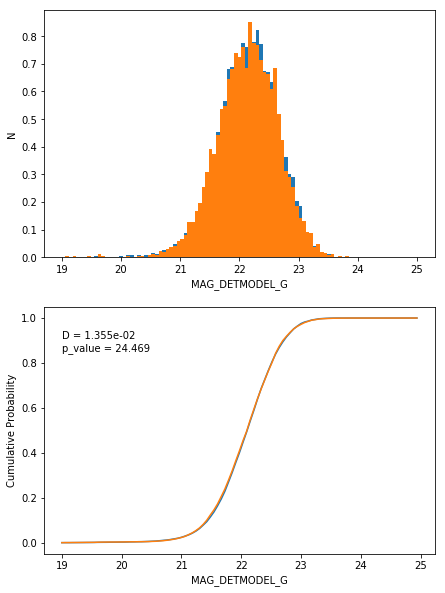

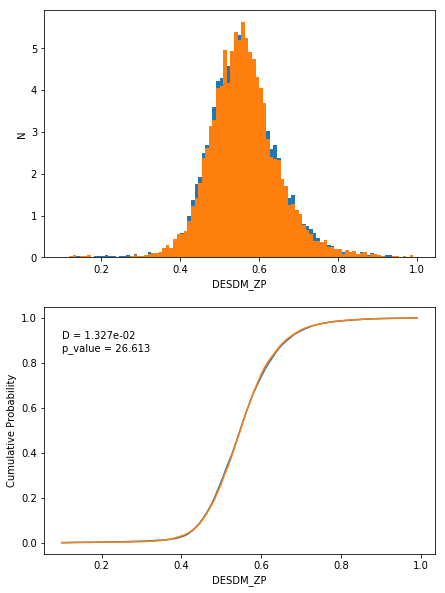

In [169]:
ks_test( cmass['MAG_DETMODEL_G'], dmass['MAG_DETMODEL_G'], tag = 'MAG_DETMODEL_G', bins=np.linspace(19,25,100) )
ks_test( cmass['MAG_DETMODEL_G'], dmass['MAG_DETMODEL_G'], tag = 'MAG_DETMODEL_G', bins=np.linspace(19,25,100) )
#ks_test( cmass['MAG_MODEL_R'], dmass['MAG_MODEL_R'], tag = 'MAG_DETMODEL_R', bins=np.linspace(18,23,100) )
#ks_test( cmass, dmass, tag = 'MAG_AUTO_I', bins=np.linspace(17,22,100) )
#ks_test( cmass, dmass, tag = 'MAG_AUTO_Z', bins=np.linspace(17,21,100) )
ks_test( cmass['DESDM_ZP'], dmass['DESDM_ZP'], tag = 'DESDM_ZP', bins=np.linspace(0.1,1.0,100) )

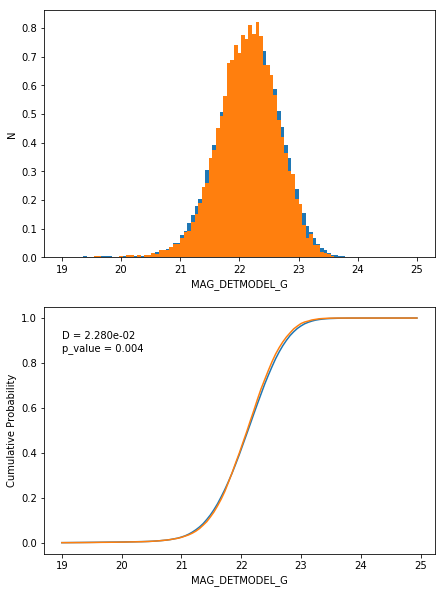

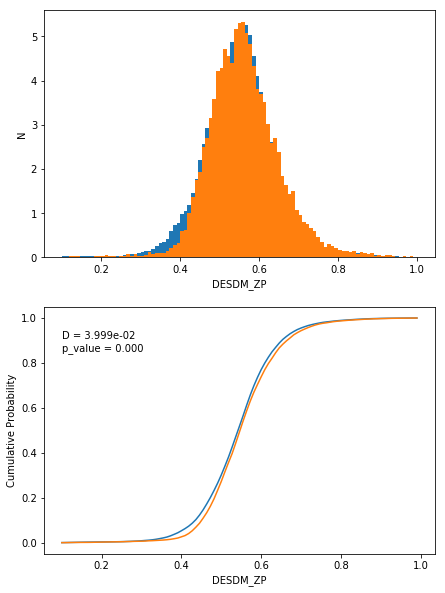

In [171]:
ks_test(dmass_spt['MAG_DETMODEL_G'] , cmass['MAG_DETMODEL_G'], tag = 'MAG_DETMODEL_G', bins=np.linspace(19,25,100) )
#ks_test( cmass, dmass_spt, tag = 'MAG_AUTO_R', bins=np.linspace(18,23,100) )
#ks_test( cmass, dmass_spt, tag = 'MAG_AUTO_I', bins=np.linspace(17,22,100) )
#ks_test( cmass, dmass, tag = 'MAG_AUTO_Z', bins=np.linspace(17,21,100) )
ks_test( dmass_spt['DESDM_ZP'], cmass['DESDM_ZP'],  tag = 'DESDM_ZP', bins=np.linspace(0.1,1.0,100) )

In [155]:
from xd import *
cmass_pickle = 'pickle/gold_st82_XD_cmass.pkl'
no_pickle = 'pickle/gold_st82_XD_no.pkl'
clf_cmass = XD_fitting( None, pickleFileName = cmass_pickle)               
clf_no = XD_fitting( None, pickleFileName = no_pickle)

In [174]:
random_model = clf_cmass.sample(size=100000)

In [177]:
random_model

array([[20.29267709, 19.46893936,  1.81908809,  0.88776012,  0.41801025],
       [20.12037196, 19.44668746,  1.76018892,  0.71180243,  0.37334144],
       [19.96777531, 19.36138154,  1.78690324,  0.63264849,  0.35226746],
       ...,
       [20.46917888, 19.69597384,  1.76163747,  0.86084222,  0.43140931],
       [20.57663001, 19.69042198,  1.69470687,  0.98056493,  0.49672198],
       [20.10382679, 19.59201583,  1.61705519,  0.55385161,  0.32846423]])

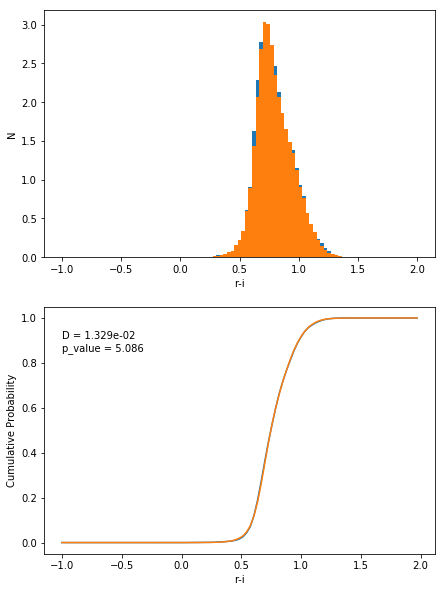

In [183]:
ks_test( cmass['MAG_DETMODEL_R']-cmass['MAG_DETMODEL_I'], random_model[:,3],  tag = 'r-i', bins=np.linspace(-1,2,100) )